# Machine Learning Homework 1 - Diagnostic
#### Yanning Cui

In [99]:
import pandas as pd
import numpy as np
import glob
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Problem 1

First of all, I download the 4 datasets from https://data.cityofchicago.org/

## Clean and Combine datasets

In [3]:
df1 = pd.read_csv("hw1/data/311_Service_Requests_-_Graffiti_Removal.csv")
df2 = pd.read_csv("hw1/data/311_Service_Requests_-_Pot_Holes_Reported.csv")
df3 = pd.read_csv("hw1/data/311_Service_Requests_-_Sanitation_Code_Complaints.csv")
df4 = pd.read_csv("hw1/data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")

I check the names of variables of each dataset. I want to select only relevant variables, rename some of them, and merge 4 datasets.

In [4]:
#use shared columns to combine data
headers_1 = df1.dtypes.index
headers_2 = df2.dtypes.index
headers_3 = df3.dtypes.index
headers_4 = df4.dtypes.index
print(headers_1)
print(headers_2)
print(headers_3)
print(headers_4)

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'Street Address', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location'],
      dtype='object')
Index(['CREATION DATE', 'STATUS', 'COMPLETION DATE', 'SERVICE REQUEST NUMBER',
       'TYPE OF SERVICE REQUEST', 'CURRENT ACTIVITY', 'MOST RECENT ACTION',
       'NUMBER OF POTHOLES FILLED ON BLOCK', 'STREET ADDRESS', 'ZIP',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')
Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'What is the Nature of this Code Violation?',
       'Street Address', 'ZIP Code', 'X Coordinate', 'Y Coordinate', 'Wa

In [5]:
#select only relevant variables
df1 = df1[['Creation Date','Completion Date',
       'Type of Service Request', 
       'Street Address', 'ZIP Code','Ward', 'Police District',
       'Community Area', 'Latitude', 'Longitude', 'Location',
       'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?']]
df2 = df2[['CREATION DATE','COMPLETION DATE',
       'TYPE OF SERVICE REQUEST',
       'STREET ADDRESS', 'ZIP', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'NUMBER OF POTHOLES FILLED ON BLOCK']]
df3 = df3[['Creation Date','Completion Date', 
       'Type of Service Request', 
       'Street Address', 'ZIP Code', 'Ward', 'Police District', 
       'Community Area', 'Latitude', 'Longitude', 'Location',
       'What is the Nature of this Code Violation?']]
df4 = df4[['DATE SERVICE REQUEST WAS RECEIVED',
        'SERVICE REQUEST TYPE', 
        'ADDRESS STREET NAME', 'ZIP CODE', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'Location',   
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)']]

In [6]:
#rename columns so that the 4 dataframes can be merged with shared column names
df2.rename(columns={'CREATION DATE': 'Creation Date',
                    'COMPLETION DATE': 'Completion Date',
                   'TYPE OF SERVICE REQUEST': 'Type of Service Request',
                   'STREET ADDRESS': 'Street Address',
                   'ZIP': 'ZIP Code',
                   'LATITUDE': 'Latitude',
                   'LONGITUDE': 'Longitude',
                   'LOCATION': 'Location'
                   }, inplace=True)

df4.rename(columns={'DATE SERVICE REQUEST WAS RECEIVED': 'Creation Date',
                   'SERVICE REQUEST TYPE': 'Type of Service Request',
                   'ADDRESS STREET NAME': 'Street Address',
                   'ZIP CODE': 'ZIP Code',
                   'LATITUDE': 'Latitude',
                   'LONGITUDE': 'Longitude'
                   }, inplace=True)

In [365]:
#combine 4 datasets and reset indexes
df = pd.concat([df1, df2, df3, df4])
df.reset_index(drop=True, inplace=True)

Then I extract date, especially month, for time series visualization.

In [366]:
#extract date to group by
df['Creation_Month'] = df['Creation Date'].str[5:7].astype(int)
#change month from int to abbr
df['Creation_Month_abr'] = df['Creation_Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
df['Address'] = df['Street Address']
df.head()

,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",Community Area,Completion Date,Creation Date,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS BUILDING OPEN OR BOARDED?,IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS THE BUILDING VACANT DUE TO FIRE?,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",...,Street Address,Type of Service Request,Ward,What Type of Surface is the Graffiti on?,What is the Nature of this Code Violation?,Where is the Graffiti located?,ZIP Code,Creation_Month,Creation_Month_abr,Address
0,NaN,20.0,01/04/2016,2016/01/01 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,4002 W BELDEN AVE,Graffiti Removal,35.0,Brick - Unpainted,NaN,Front,60639.0,1,Jan,4002 W BELDEN AVE
1,NaN,22.0,01/04/2016,2016/01/01 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,3324 W SCHUBERT AVE,Graffiti Removal,35.0,Brick - Unpainted,NaN,Alley,60647.0,1,Jan,3324 W SCHUBERT AVE
2,NaN,59.0,01/04/2016,2016/01/01 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,3700 S ARCHER AVE,Graffiti Removal,12.0,Brick - Unpainted,NaN,Side,60632.0,1,Jan,3700 S ARCHER AVE
3,NaN,1.0,01/04/2016,2016/01/01 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,1503 W MORSE AVE,Graffiti Removal,49.0,Metal - Painted,NaN,Front,60626.0,1,Jan,1503 W MORSE AVE
4,NaN,1.0,01/04/2016,2016/01/01 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,1447 W MORSE AVE,Graffiti Removal,49.0,Metal - Painted,NaN,Front,60626.0,1,Jan,1447 W MORSE AVE


## Generate summary statistics for these requests 
1. number of requests of each type over time
2. subtype within each of the types over time
3. number of requests of each type by neighborhood
4. response time of each type of request by the city. Please use a combination of tables and graphs to present these summary stats.

### 1. number of requests of each type over time

In [11]:
type_time = df[['Type of Service Request', 'Creation_Month_abr']]

In [12]:
#group by type of request and Date
type_time_df = type_time.groupby(["Type of Service Request", 'Creation_Month_abr']).size().reset_index()
type_time_df.columns = ['Type', 'Date', 'Count']

In [300]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

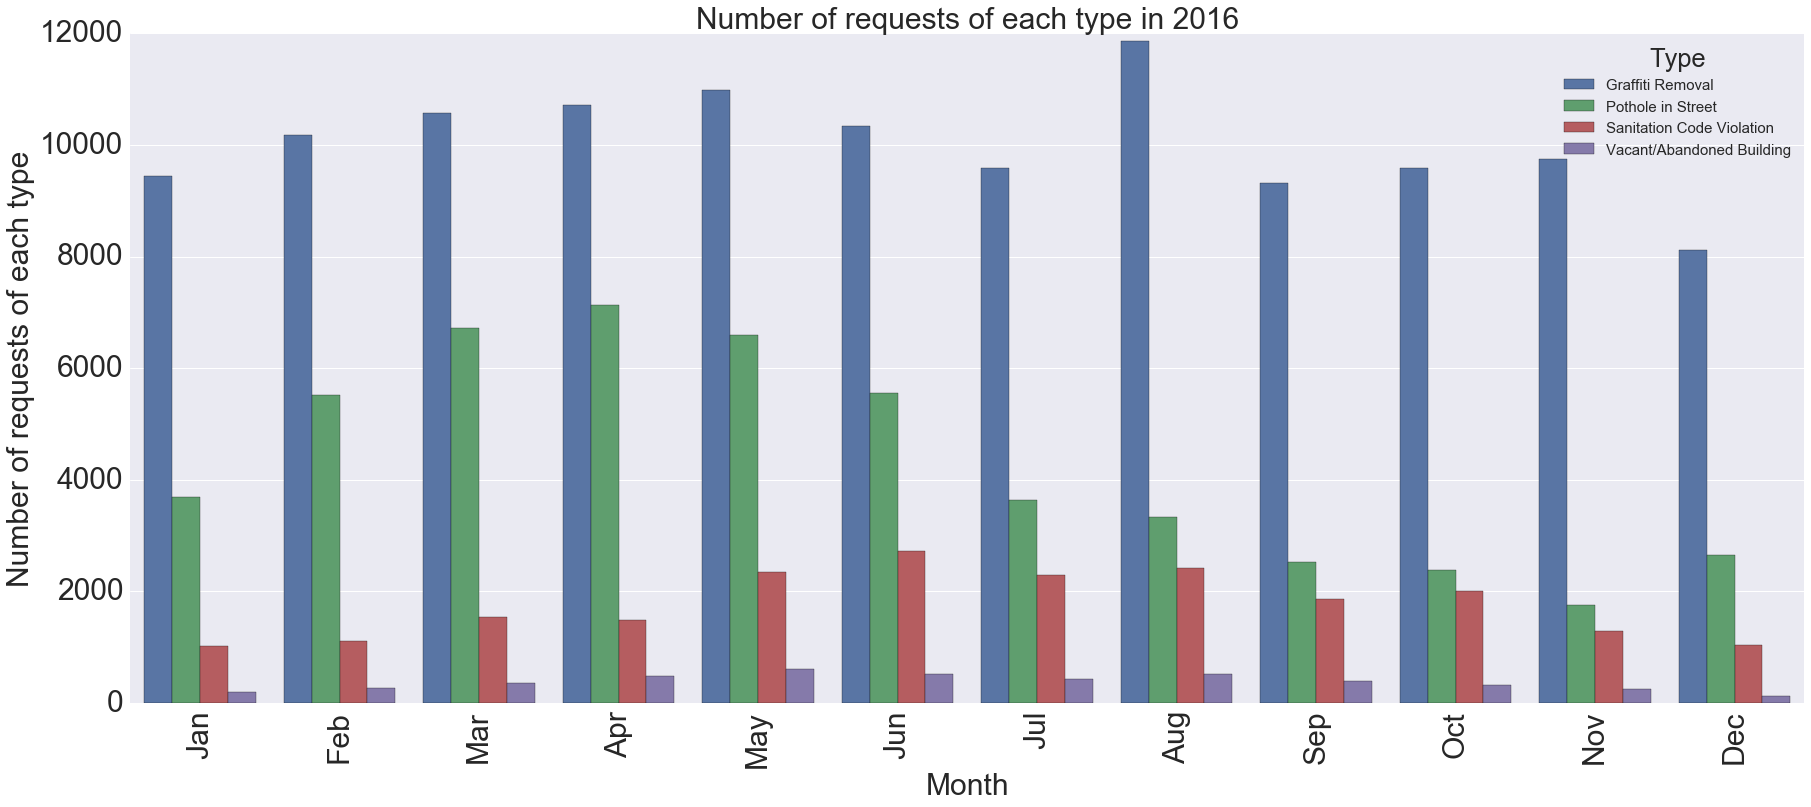

In [301]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = type_time_df["Date"], y = type_time_df["Count"], order = order, hue = type_time_df["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "Month", ylabel = "Number of requests of each type", title = "Number of requests of each type in 2016")
plt.savefig("Number of requests of each type in 2016.png", bbox_inches='tight')

From the figure above, we can observe the number of requests of each type by month in 2016.

### 2. subtype within each of the types over time

Here I visualize the subtype of sanitation code violation

In [14]:
Sani = df[df['Type of Service Request'] == 'Sanitation Code Violation']
Sani = Sani[["What is the Nature of this Code Violation?", 'Creation_Month_abr']]

In [15]:
subtype_sani = Sani.groupby(["What is the Nature of this Code Violation?", 'Creation_Month_abr']).size().reset_index()
subtype_sani.columns = ['Subtype', 'Date', 'Count']

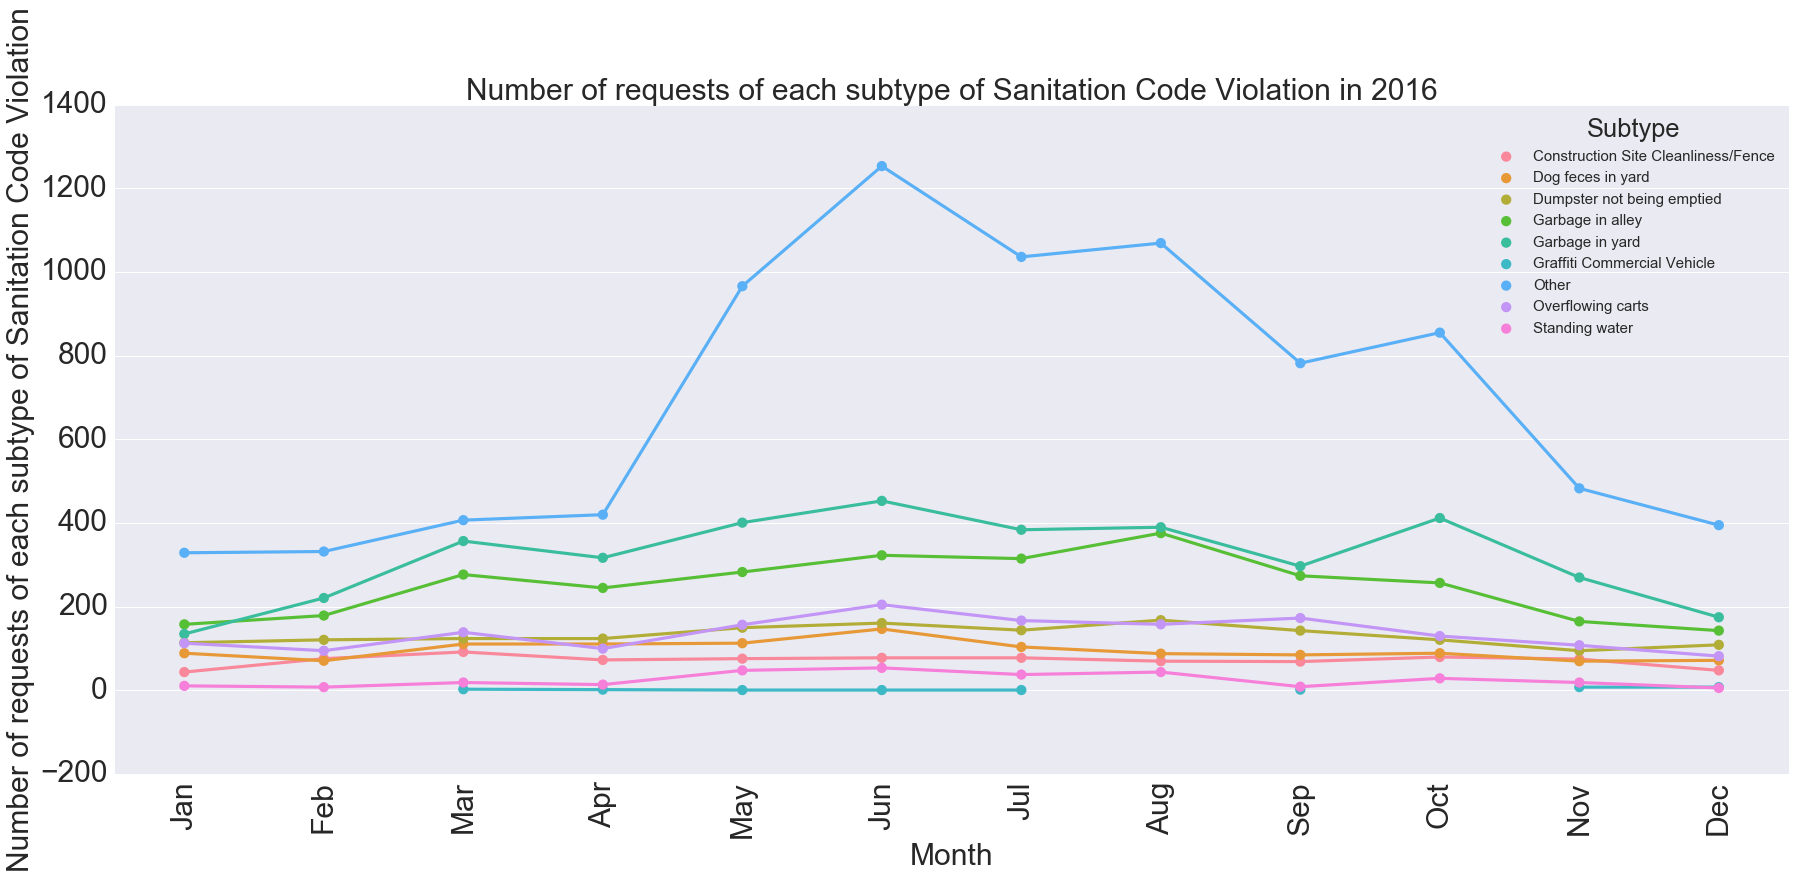

In [302]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.pointplot(ci = None, x = subtype_sani["Date"], y = subtype_sani["Count"], order = order, hue = subtype_sani["Subtype"])
plt.xticks(rotation=90)
g.set(xlabel = "Month", ylabel = "Number of requests of each subtype of Sanitation Code Violation", title = "Number of requests of each subtype of Sanitation Code Violation in 2016")
plt.savefig("Number of requests of each subtype of Sanitation Code Violation in 2016.png", bbox_inches='tight')

#### What if we get rid of 'other' subtype? It seems a little bit annoying here.

In [17]:
Sani2 = df[df['Type of Service Request'] == 'Sanitation Code Violation']
Sani2 = Sani2[~(Sani2["What is the Nature of this Code Violation?"] == "Other")]
Sani2 = Sani2[["What is the Nature of this Code Violation?", 'Creation_Month_abr']]
subtype_sani2 = Sani2.groupby(["What is the Nature of this Code Violation?", 'Creation_Month_abr']).size().reset_index()
subtype_sani2.columns = ['Subtype', 'Date', 'Count']

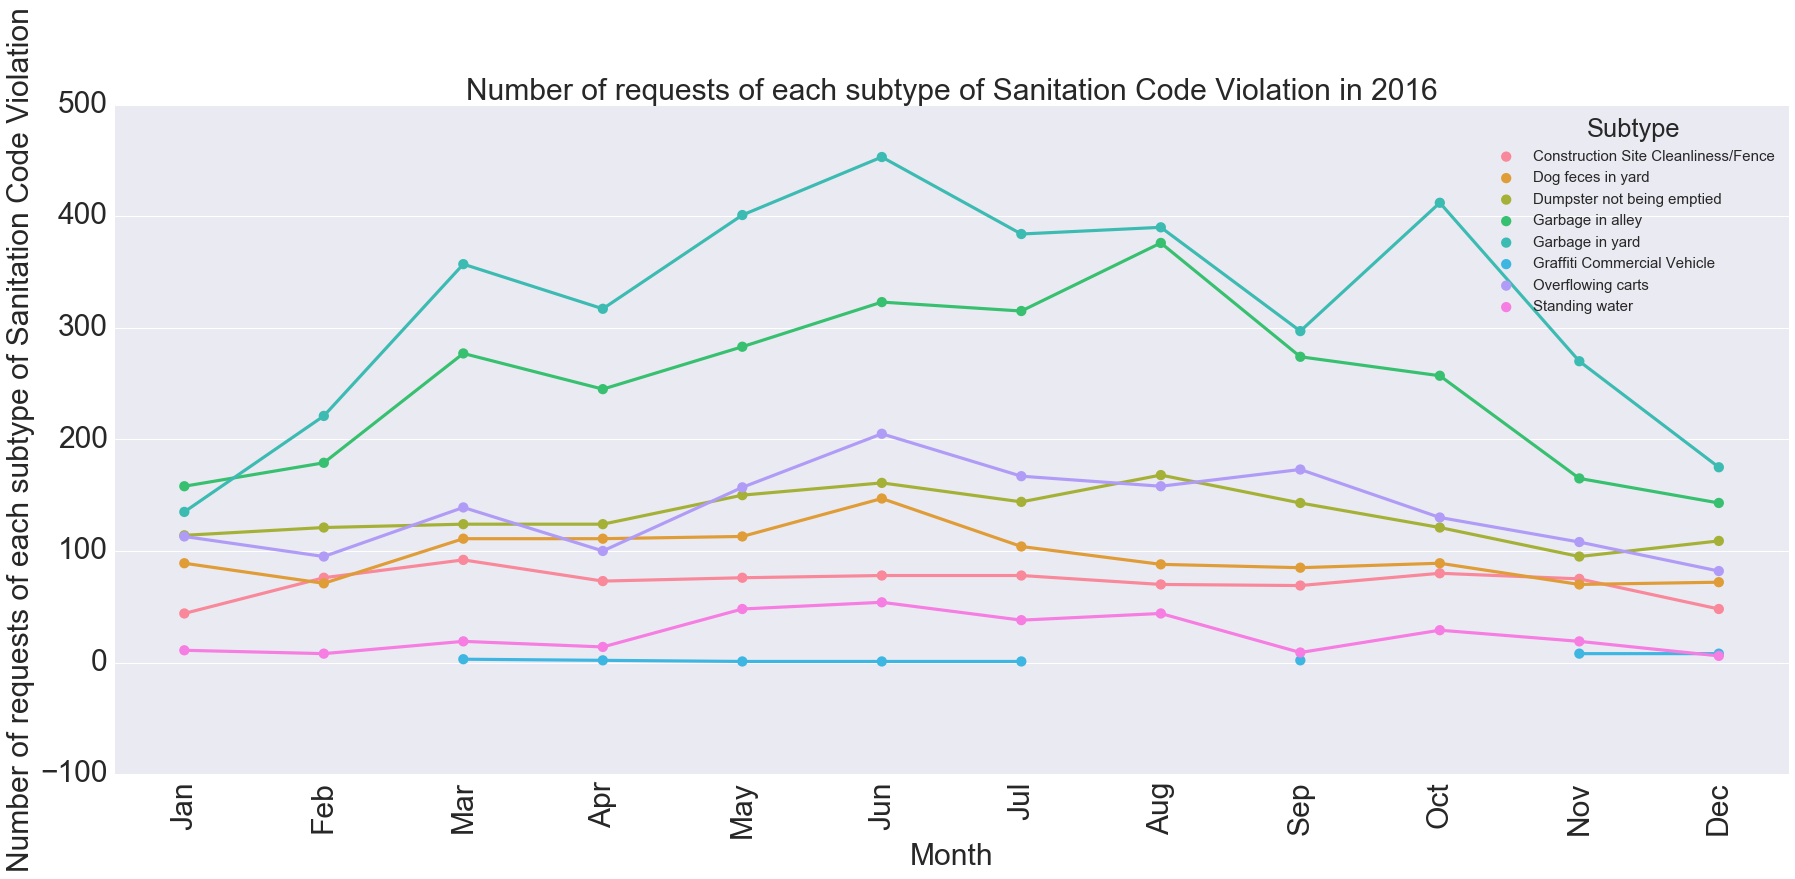

In [303]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.pointplot(ci = None, x = subtype_sani2["Date"], y = subtype_sani2["Count"], order = order, hue = subtype_sani2["Subtype"])
plt.xticks(rotation=90)
g.set(xlabel = "Month", ylabel = "Number of requests of each subtype of Sanitation Code Violation", title = "Number of requests of each subtype of Sanitation Code Violation in 2016")
plt.savefig("Number of requests of each subtype of Sanitation Code Violation in 2016_2.png", bbox_inches='tight')

### 3. number of requests of each type by neighborhood

Here I use zip code to represent neighborhood

In [153]:
type_neighborhood = df[['Type of Service Request', 'ZIP Code']]
type_neighborhood = type_neighborhood.groupby(['Type of Service Request', 'ZIP Code']).size().reset_index()
type_neighborhood.columns = ['Type', 'ZIP Code','Count']
#type_neighborhood

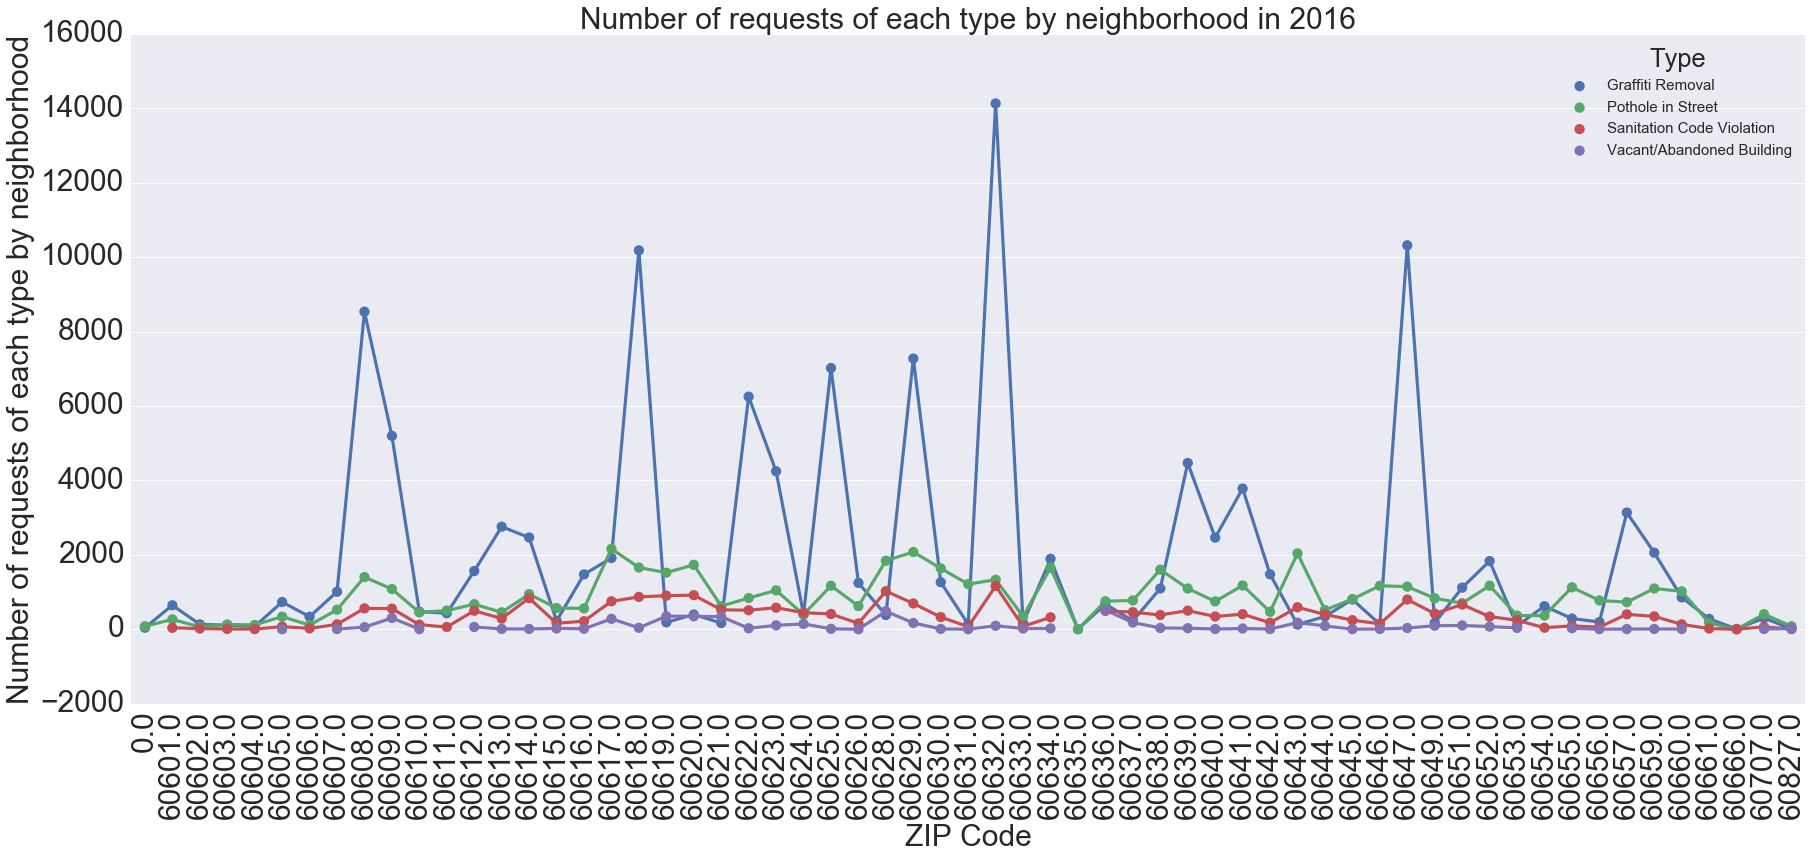

In [20]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.pointplot(ci = None, x = type_neighborhood["ZIP Code"], y = type_neighborhood["Count"], hue = type_neighborhood["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "ZIP Code", ylabel = "Number of requests of each type by neighborhood", title = "Number of requests of each type by neighborhood in 2016")
plt.savefig("Number of requests of each type by neighborhood in 2016.png", bbox_inches='tight')

### 4. response time of each type of request by the city

Because there is no 'completion date' in 'Vacant_and_Abandoned_Buildings_Reported' dataset, here I will only calculate the response time for the other three datasets.

#### response time = average (completion date - creation date)  days

In [115]:
#select 3 datasets and relevant variables
response_df = df[~(df['Type of Service Request'] == 'Vacant/Abandoned Building')]
response_df = response_df[["Completion Date", 'Creation Date', 'Type of Service Request','ZIP Code']]

In [156]:
#convert creation/completion date in the same format to do subtraction
response_df['Creation_Date'] = response_df['Creation Date'].str[5:10] + '/2016'
response_df['Completion_Date'] = response_df['Completion Date']
#drop na
response_df = response_df[response_df.Completion_Date.notnull()]

In [117]:
#function to subtract date
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)

In [118]:
#subtract date
response_time=[]
for i in range(191085): 
    a=response_df['Creation_Date'].iloc[i]
    b=response_df['Completion_Date'].iloc[i]
    a=str(a)
    b=str(b)
    response_time.append(days_between(a,b))

In [119]:
#add a column to store response time in days
response_df['response_time'] = response_time

In [155]:
response_df.head()

,Completion Date,Creation Date,Type of Service Request,ZIP Code,Creation_Date,Completion_Date,response_time
0,01/04/2016,2016/01/01 12:00:00 AM,Graffiti Removal,60639.0,01/01/2016,01/04/2016,3
1,01/04/2016,2016/01/01 12:00:00 AM,Graffiti Removal,60647.0,01/01/2016,01/04/2016,3
2,01/04/2016,2016/01/01 12:00:00 AM,Graffiti Removal,60632.0,01/01/2016,01/04/2016,3
3,01/04/2016,2016/01/01 12:00:00 AM,Graffiti Removal,60626.0,01/01/2016,01/04/2016,3
4,01/04/2016,2016/01/01 12:00:00 AM,Graffiti Removal,60626.0,01/01/2016,01/04/2016,3


In [146]:
#group by type and zip code
response_city = response_df.groupby(['Type of Service Request', 'ZIP Code']).mean().reset_index()
response_city.columns = ['Type', 'ZIP Code','Average Response Time']
response_city

,Type,ZIP Code,Average Response Time
0,Graffiti Removal,0.0,0.309524
1,Graffiti Removal,60601.0,0.773643
2,Graffiti Removal,60602.0,0.571429
3,Graffiti Removal,60603.0,0.472727
4,Graffiti Removal,60604.0,0.381579
5,Graffiti Removal,60605.0,0.717984
6,Graffiti Removal,60606.0,0.575668
7,Graffiti Removal,60607.0,0.596630
8,Graffiti Removal,60608.0,0.544922
9,Graffiti Removal,60609.0,0.495288


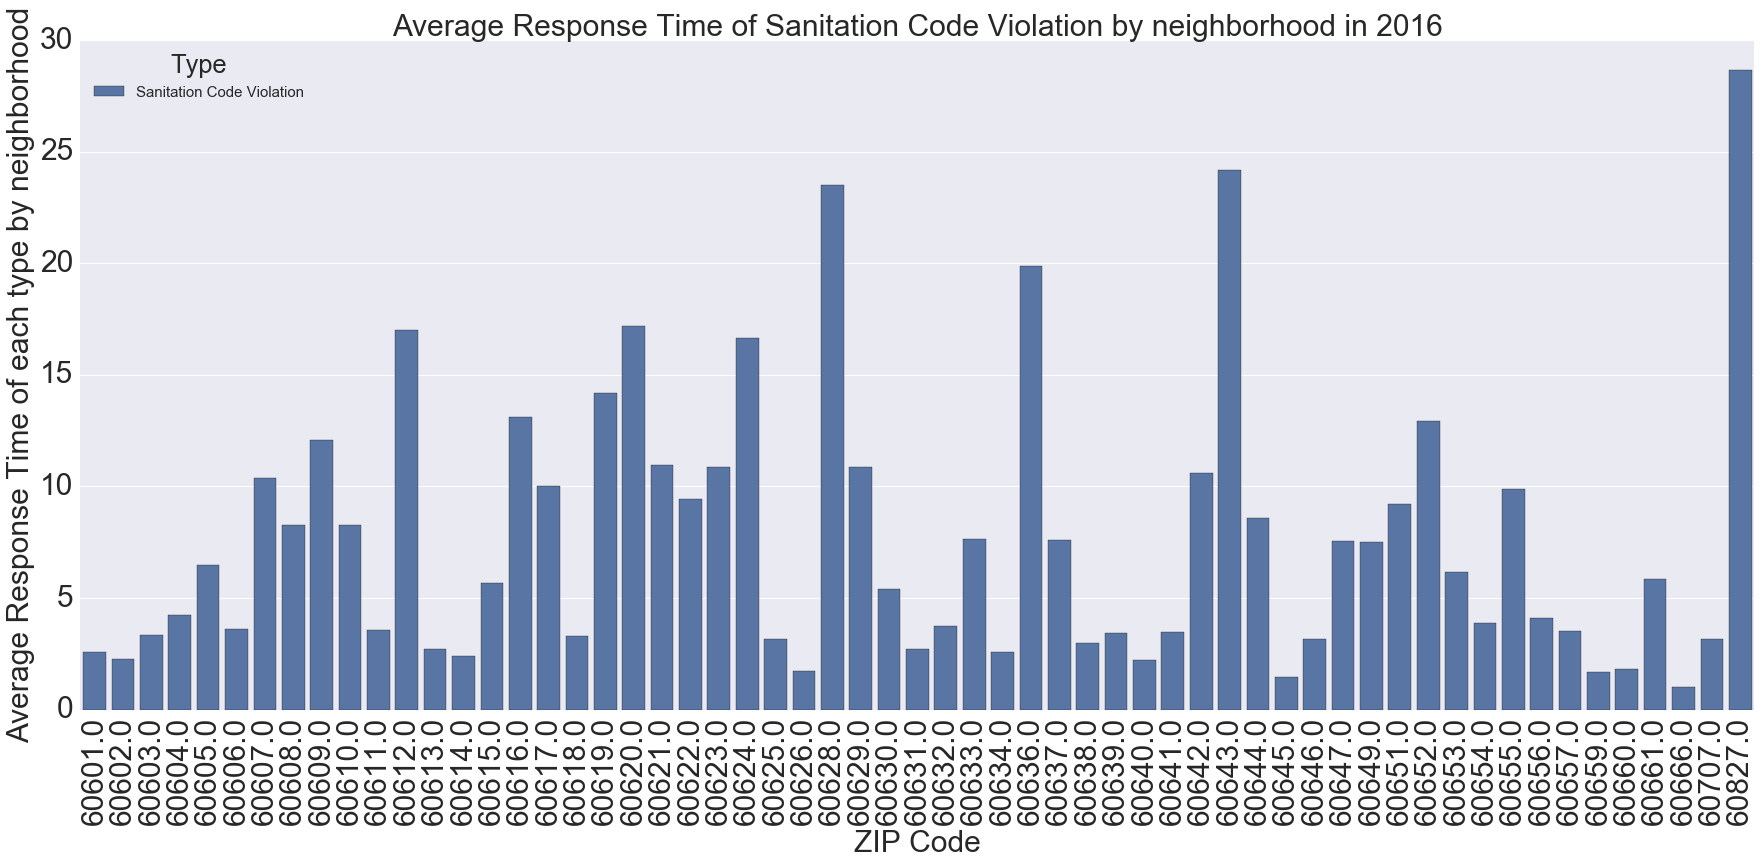

In [147]:
#visualize results
response_S = response_city[response_city['Type'] == 'Sanitation Code Violation']
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = response_S["ZIP Code"], y = response_S['Average Response Time'], hue = response_S["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "ZIP Code", ylabel = "Average Response Time of each type by neighborhood", title = "Average Response Time of Sanitation Code Violation by neighborhood in 2016")
plt.savefig("Average Response Time of Sanitation by neighborhood in 2016.png", bbox_inches='tight')

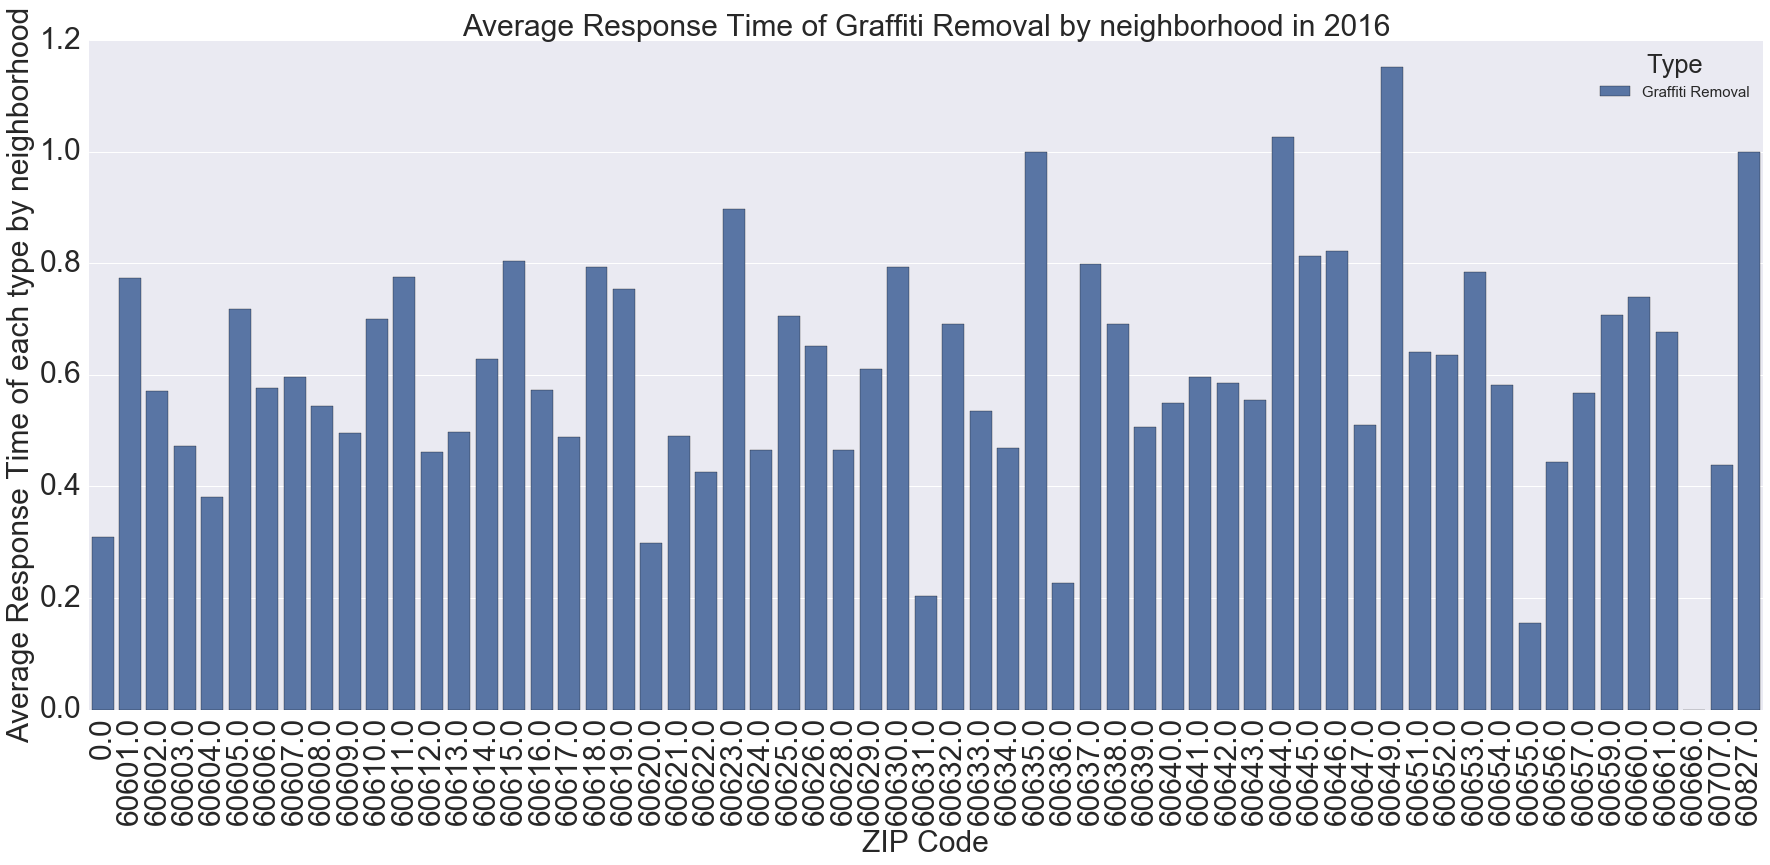

In [148]:
#visualize results
response_G = response_city[response_city['Type'] == 'Graffiti Removal']
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = response_G["ZIP Code"], y = response_G['Average Response Time'], hue = response_G["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "ZIP Code", ylabel = "Average Response Time of each type by neighborhood", title = "Average Response Time of Graffiti Removal by neighborhood in 2016")
plt.savefig("Average Response Time of Graffiti by neighborhood in 2016.png", bbox_inches='tight')

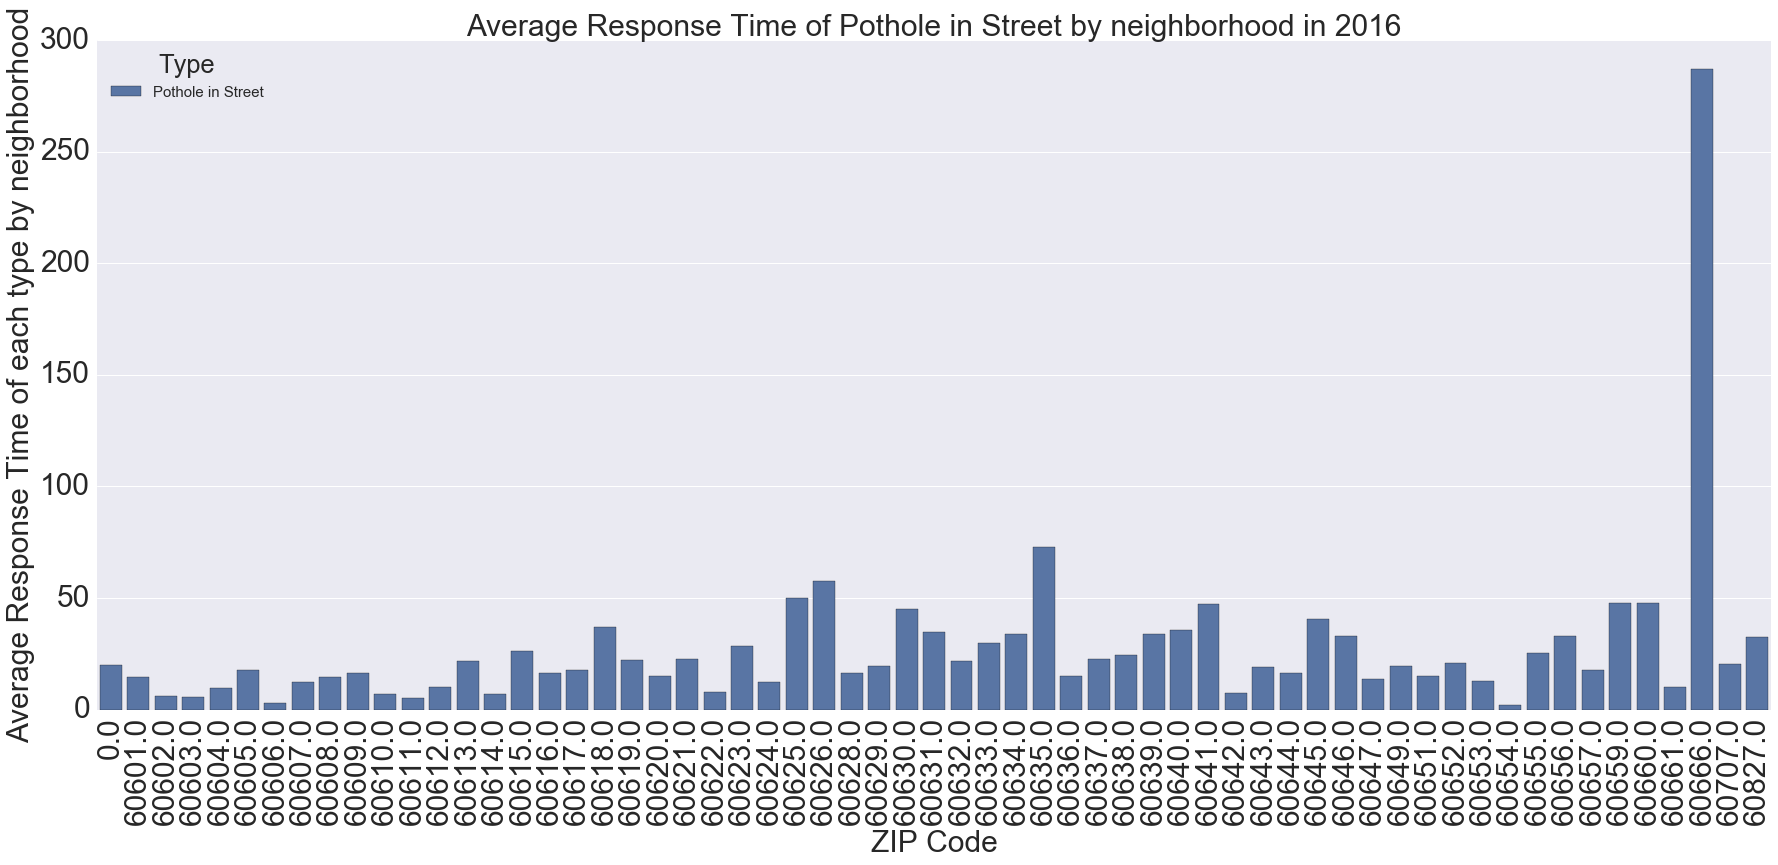

In [149]:
#visualize results
response_P = response_city[response_city['Type'] == 'Pothole in Street']
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = response_P["ZIP Code"], y = response_P['Average Response Time'], hue = response_P["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "ZIP Code", ylabel = "Average Response Time of each type by neighborhood", title = "Average Response Time of Pothole in Street by neighborhood in 2016")
plt.savefig("Average Response Time of Pothole in Street by neighborhood in 2016.png", bbox_inches='tight')

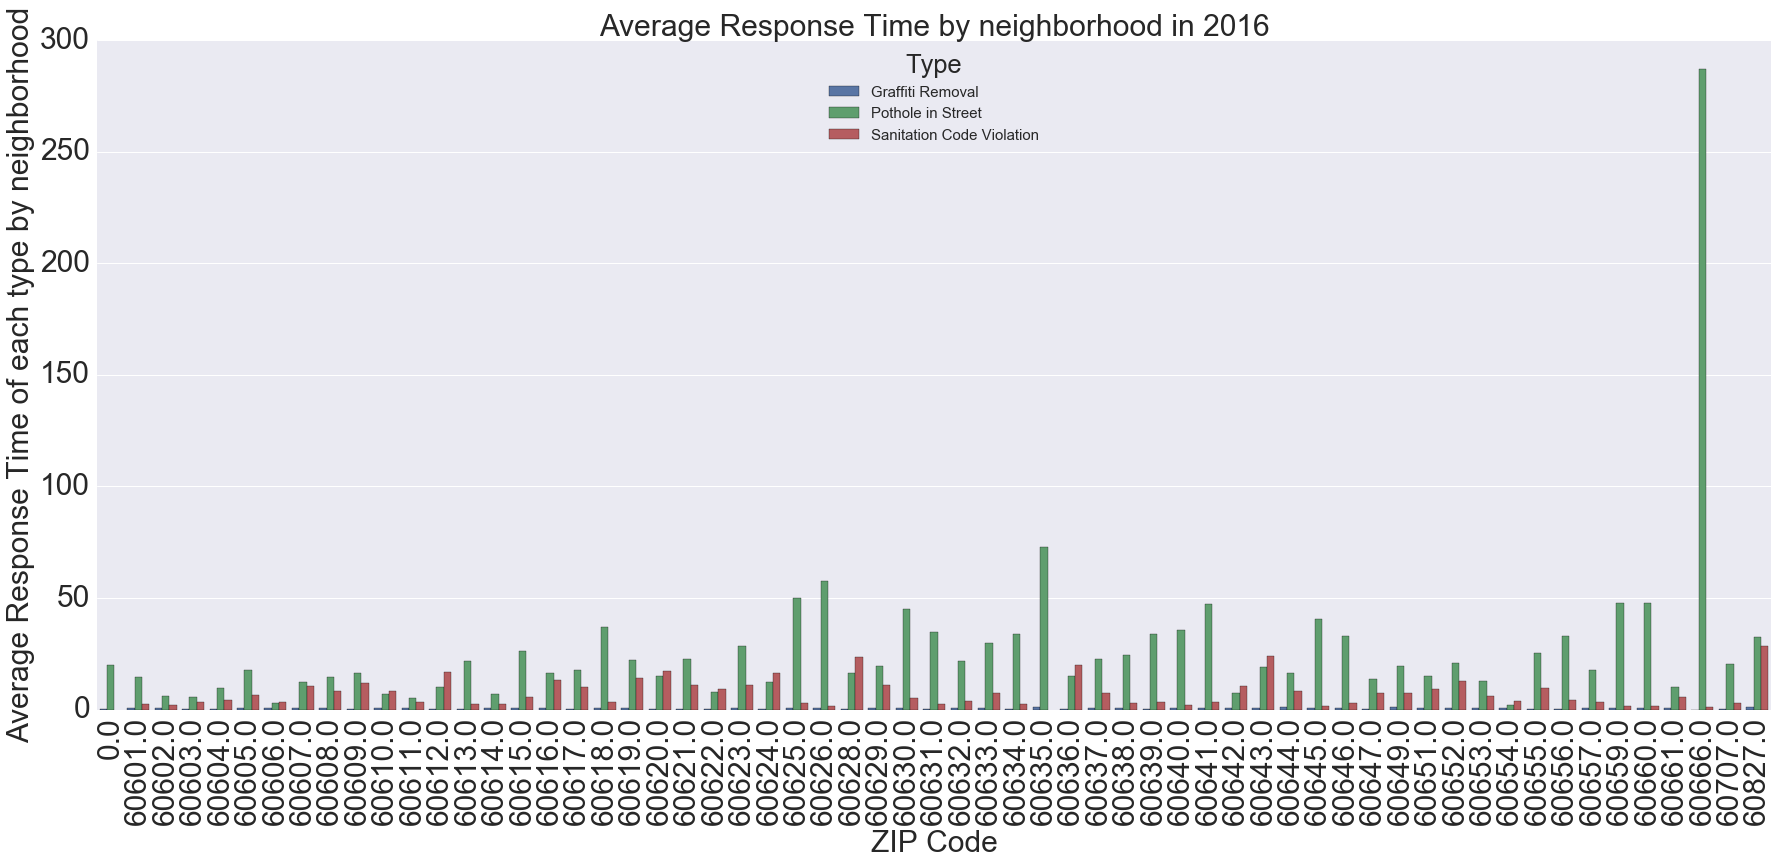

In [150]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = response_city["ZIP Code"], y = response_city['Average Response Time'], hue = response_city["Type"])
plt.xticks(rotation=90)
g.set(xlabel = "ZIP Code", ylabel = "Average Response Time of each type by neighborhood", title = "Average Response Time by neighborhood in 2016")
plt.savefig("Average Response Time by neighborhood in 2016.png", bbox_inches='tight')

### Based on these summary statistics, tell me 5 interesting things you learned (about Chicago and the different neighborhoods) using the 311 data.

1. 60666 takes the longest time to respond to Pothole in Street, a lot longer than other neighborhoods. This neighborhood is also special, because it is majorly O'Hare Airport.
2. There are far more Graffiti Removal than other types in 2016.
3. In Sanitation Code Violation, garbage in alley/yard are the most common subtypes.
4. Generally, there are more Pothole in Street in the first half of 2016 than the second half of 2016.
5. 60827 has the most Sanitation Code Violation in 2016.

# Problem 2: Data Augmentation and APIs

I use only “Vacant and Abandoned Buildings Reported” and “Sanitation Code Complaints” for the past year.

In [263]:
df_sani = df[df['Type of Service Request'] == 'Sanitation Code Violation']
df_vacant = df[df['Type of Service Request'] == 'Vacant/Abandoned Building']
df_merged = pd.concat([df_sani, df_vacant]).reset_index()
df_merged = df_sv[['Creation Date','Type of Service Request', 
       'Street Address', 'ZIP Code', 'Latitude', 'Longitude', 'Location']]
df_merged['ZIP'] = df_merged['ZIP Code']
#drop na
df_merged = df_merged[df_merged.ZIP.notnull()]
df_merged['ZIP'] = df_merged['ZIP'].astype(int)
df_merged.head()

,Creation Date,Type of Service Request,Street Address,ZIP Code,Latitude,Longitude,Location,ZIP
0,2016/01/01 12:00:00 AM,Sanitation Code Violation,18 N TALMAN AVE,60612.0,41.881106,-87.692162,"(41.88110597862378, -87.69216226978267)",60612
1,2016/01/01 12:00:00 AM,Sanitation Code Violation,7938 S WABASH AVE,60619.0,41.750278,-87.622979,"(41.750278002798325, -87.62297857190532)",60619
2,2016/01/01 12:00:00 AM,Sanitation Code Violation,442 W WACKER DR ER,60607.0,41.875985,-87.636291,"(41.87598480231486, -87.6362905484112)",60607
3,2016/01/01 12:00:00 AM,Sanitation Code Violation,2712 W ARTHUR AVE,60645.0,41.999420,-87.697727,"(41.999419638611165, -87.69772708238521)",60645
4,2016/01/01 12:00:00 AM,Sanitation Code Violation,3030 N HONORE ST,60657.0,41.936888,-87.674216,"(41.93688765836184, -87.67421593086208)",60657


Use groupby to count number of requests of each type by zip code

In [286]:
type_zip = df_merged.groupby(['Type of Service Request', 'ZIP']).size().reset_index()
type_zip.columns = ['Type', 'ZIP','Count']
type_zip

,Type,ZIP,Count
0,Sanitation Code Violation,60601,39
1,Sanitation Code Violation,60602,19
2,Sanitation Code Violation,60603,9
3,Sanitation Code Violation,60604,4
4,Sanitation Code Violation,60605,72
5,Sanitation Code Violation,60606,23
6,Sanitation Code Violation,60607,132
7,Sanitation Code Violation,60608,562
8,Sanitation Code Violation,60609,556
9,Sanitation Code Violation,60610,124


create a new dataframe to store results from api call, and then merge the two dataframes based on ZIP code

In [264]:
#create a new dataframe to store results from api call
df_api = pd.DataFrame()
zip = pd.DataFrame(df_merged['ZIP'].astype(int).unique())  
zip.columns = ['ZIP']
df_api['ZIP'] = zip['ZIP']
df_api['White'] = 0
df_api['Black or African American'] = 0
df_api['Asian'] = 0
df_api['Median family income'] = 0
df_api['Married Man'] = 0
df_api['Divorced Man'] = 0
df_api.head()

,ZIP,White,Black or African American,Asian,Median family income,Married Man,Divorced Man
0,60612,0,0,0,0,0,0
1,60619,0,0,0,0,0,0
2,60607,0,0,0,0,0,0
3,60645,0,0,0,0,0,0
4,60657,0,0,0,0,0,0


Use census api to retrieve race, income, and marital status variables based on different zip codes

There seems to be some missing values and a small bug

In [266]:
api_prefix = "http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:"
api_surfix = "&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5"

for index, row in df_api.iterrows():
    api_url = api_prefix+str(int(row['ZIP']))+api_surfix
    print(api_url)
    result_df = pd.read_json(api_url)
    df_api.set_value(index, 'White', result_df[0].iloc[1])
    df_api.set_value(index, 'Black or African American', result_df[1].iloc[1])
    df_api.set_value(index, 'Asian', result_df[2].iloc[1])
    df_api.set_value(index, 'Median family income', result_df[3].iloc[1])
    df_api.set_value(index, 'Married Man', result_df[4].iloc[1])
    df_api.set_value(index, 'Divorced Man', result_df[5].iloc[1])

http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:60612&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5
http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:60619&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5
http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:60607&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5
http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:60645&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5
http://api.census.gov/data/2015/acs5?get=B02001_002E,B02001_003E,B02001_005E,B10010_001E,B12001_004E,B12001_010E&for=zip+code+tabulation+area:60657&key=622d9518076b068dd5caccd77f48b8b14ce5b9a5
http://api.census.gov/data/2015/acs

ValueError: Expected object or value

In [268]:
df_api.head()

,ZIP,White,Black or African American,Asian,Median family income,Married Man,Divorced Man
0,60612,9228,23361,1435,28095.0,3370,1237
1,60619,763,61455,203,48689.0,6332,2402
2,60607,16625,3943,5527,26696.0,4117,728
3,60645,27145,8073,7590,40987.0,8960,1109
4,60657,59621,1879,4948,NaN,10064,1682


### Merge two dataframes using key = ZIP

In [375]:
df_aug = pd.merge(type_zip, df_api, on='ZIP').dropna()
df_aug.head()

,Type,ZIP,Count,White,Black or African American,Asian,Median family income,Married Man,Divorced Man
1,Sanitation Code Violation,60602,19,0,0,0,0.0,0,0
3,Sanitation Code Violation,60604,4,0,0,0,0.0,0,0
7,Sanitation Code Violation,60607,132,16625,3943,5527,26696.0,4117,728
8,Vacant/Abandoned Building,60607,6,16625,3943,5527,26696.0,4117,728
9,Sanitation Code Violation,60608,562,37447,13080,7734,36295.0,11393,2161


### Based on this augmented data, do some descriptive statistics to describe:
#### 1. What types of blocks get “Vacant and Abandoned Buildings Reported”?

In [289]:
#sort vacant/abandoned counts and observe characteristics of this block
df_aug_v = df_aug[df_aug['Type'] == 'Vacant/Abandoned Building']
df_aug_v.sort_values(by='Count', ascending=0)

,Type,ZIP,Count,White,Black or African American,Asian,Median family income,Married Man,Divorced Man
61,Vacant/Abandoned Building,60636,514,713,34572,117,39450.0,3270,1208
47,Vacant/Abandoned Building,60628,485,2724,63916,210,41328.0,7303,2696
31,Vacant/Abandoned Building,60619,352,763,61455,203,48689.0,6332,2402
33,Vacant/Abandoned Building,60620,348,1094,67353,159,42909.0,7303,2447
35,Vacant/Abandoned Building,60621,341,479,30355,84,33719.0,2453,1184
12,Vacant/Abandoned Building,60609,304,29964,15310,3347,34973.0,9430,1465
27,Vacant/Abandoned Building,60617,281,29797,46173,146,51055.0,11977,2402
63,Vacant/Abandoned Building,60637,182,7707,39096,2148,22056.0,4504,1420
41,Vacant/Abandoned Building,60624,144,1038,36007,72,33870.0,2618,883
39,Vacant/Abandoned Building,60623,106,41510,28593,178,33691.0,11499,1710


It will be better if we build a linear regression model to check what types of blocks are more likely to get certain types of request. But for now, I just eyebow some descriptive statistics:

60636 is the neighborhood that gets the most 'Vacant/Abandoned Building'. It has relatively fewer white people.

#### 2. What types of blocks get “Sanitation Code Complaints”?

In [290]:
#sort vacant/abandoned counts and observe characteristics of this block
df_aug_s = df_aug[df_aug['Type'] == 'Sanitation Code Violation']
df_aug_s.sort_values(by='Count', ascending=0)

,Type,ZIP,Count,White,Black or African American,Asian,Median family income,Married Man,Divorced Man
46,Sanitation Code Violation,60628,1023,2724,63916,210,41328.0,7303,2696
32,Sanitation Code Violation,60620,917,1094,67353,159,42909.0,7303,2447
30,Sanitation Code Violation,60619,903,763,61455,203,48689.0,6332,2402
28,Sanitation Code Violation,60618,871,78374,2169,5402,54150.0,17783,2261
20,Sanitation Code Violation,60614,837,59788,3086,4005,31371.0,10729,1356
26,Sanitation Code Violation,60617,752,29797,46173,146,51055.0,11977,2402
86,Sanitation Code Violation,60651,665,7961,37540,253,33520.0,7400,1609
38,Sanitation Code Violation,60623,579,41510,28593,178,33691.0,11499,1710
9,Sanitation Code Violation,60608,562,37447,13080,7734,36295.0,11393,2161
11,Sanitation Code Violation,60609,556,29964,15310,3347,34973.0,9430,1465


60628, 60620, 60619 are three neighborhoods that get the most 'Sanitation Code Violation', and they also have the most Black/African American population.

#### 3. Does that change over time in the data you collected?

In [304]:
df_merge = pd.merge(df_merged, df_api, on='ZIP').dropna()
#extract date to group by
df_merge['Creation_Month'] = df_merge['Creation Date'].str[5:7].astype(int)
#change month from int to abbr
df_merge['Creation_Month_abr'] = df_merge['Creation_Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
df_merge.head()

,Creation Date,Type of Service Request,Street Address,ZIP Code,Latitude,Longitude,Location,ZIP,White,Black or African American,Asian,Median family income,Married Man,Divorced Man,Creation_Month,Creation_Month_abr
0,2016/01/01 12:00:00 AM,Sanitation Code Violation,18 N TALMAN AVE,60612.0,41.881106,-87.692162,"(41.88110597862378, -87.69216226978267)",60612,9228,23361,1435,28095.0,3370,1237,1,Jan
1,2016/01/03 12:00:00 AM,Sanitation Code Violation,2814 W WILCOX ST,60612.0,41.879250,-87.696588,"(41.879250470007854, -87.69658787453378)",60612,9228,23361,1435,28095.0,3370,1237,1,Jan
2,2016/01/05 12:00:00 AM,Sanitation Code Violation,2047 W SUPERIOR ST,60612.0,41.894782,-87.678181,"(41.89478237177518, -87.67818050892316)",60612,9228,23361,1435,28095.0,3370,1237,1,Jan
3,2016/01/07 12:00:00 AM,Sanitation Code Violation,2047 W SUPERIOR ST,60612.0,41.894782,-87.678181,"(41.89478237177518, -87.67818050892316)",60612,9228,23361,1435,28095.0,3370,1237,1,Jan
4,2016/01/07 12:00:00 AM,Sanitation Code Violation,2049 W SUPERIOR ST,60612.0,41.894782,-87.678230,"(41.89478155700677, -87.67823010183714)",60612,9228,23361,1435,28095.0,3370,1237,1,Jan


#### Do types of blocks that get “Vacant and Abandoned Buildings Reported” change?

In [376]:
df_merge_v = df_merge[df_merge['Type of Service Request'] == 'Vacant/Abandoned Building']
df_merge_v = df_merge_v[df_merge_v['ZIP'] == 60636]
df_merge_v.head()

,Creation Date,Type of Service Request,Street Address,ZIP Code,Latitude,Longitude,Location,ZIP,White,Black or African American,Asian,Median family income,Married Man,Divorced Man,Creation_Month,Creation_Month_abr
22110,2016/01/03 12:00:00 AM,Vacant/Abandoned Building,JUSTINE,60636.0,41.786764,-87.663167,"(41.786764299374006, -87.66316688619024)",60636,713,34572,117,39450.0,3270,1208,1,Jan
22111,2016/01/05 12:00:00 AM,Vacant/Abandoned Building,MARSHFIELD,60636.0,41.791604,-87.665735,"(41.79160445882048, -87.66573532592452)",60636,713,34572,117,39450.0,3270,1208,1,Jan
22112,2016/01/05 12:00:00 AM,Vacant/Abandoned Building,69TH,60636.0,41.767533,-87.673651,"(41.76753260571412, -87.67365149660664)",60636,713,34572,117,39450.0,3270,1208,1,Jan
22113,2016/01/05 12:00:00 AM,Vacant/Abandoned Building,71ST,60636.0,41.764743,-87.679766,"(41.76474345100749, -87.67976571002397)",60636,713,34572,117,39450.0,3270,1208,1,Jan
22114,2016/01/05 12:00:00 AM,Vacant/Abandoned Building,WOLCOTT,60636.0,41.763951,-87.671079,"(41.76395076061212, -87.6710785925552)",60636,713,34572,117,39450.0,3270,1208,1,Jan


In [311]:
#group by Date
df_merge_v_groupby = df_merge_v.groupby(['Creation_Month_abr']).size().reset_index()
df_merge_v_groupby.columns = ['Date', 'Count']

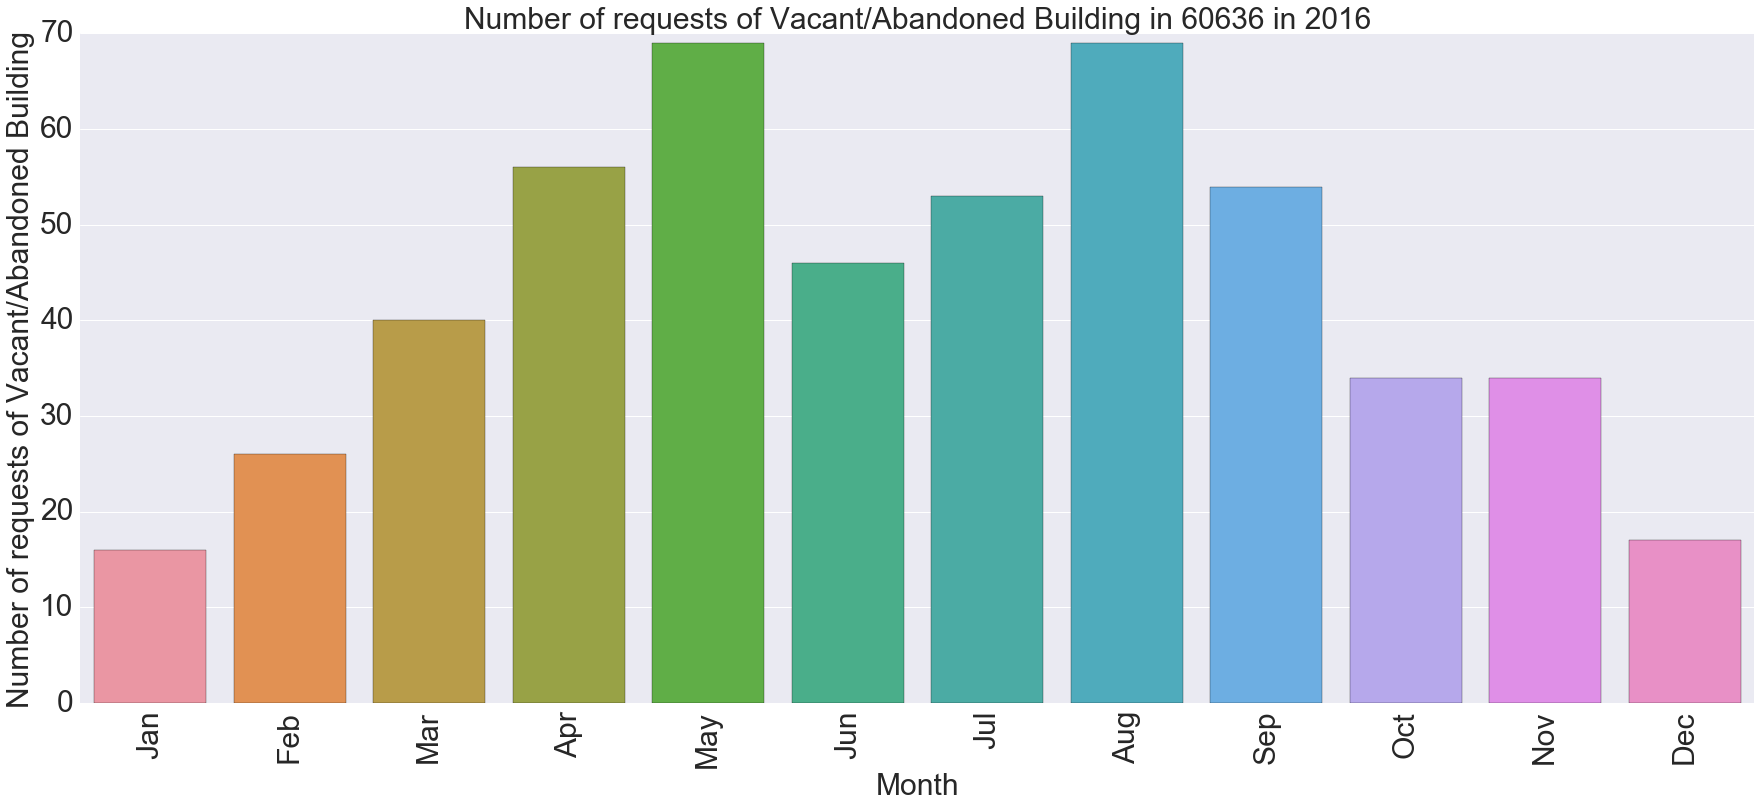

In [317]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = df_merge_v_groupby["Date"], y = df_merge_v_groupby["Count"], order = order)
plt.xticks(rotation=90)
g.set(xlabel = "Month", ylabel = "Number of requests of Vacant/Abandoned Building", title = "Number of requests of Vacant/Abandoned Building in 60636 in 2016")
#plt.savefig("Number of requests of Vacant/Abandoned Building in 60636.png", bbox_inches='tight')

In 60636, there are more requests about Vacant/Abandoned Building in spring/summber than fall/winter.

#### Do types of blocks that get “Sanitation Code Complaints” change?

In [318]:
df_merge_s = df_merge[df_merge['Type of Service Request'] == 'Sanitation Code Violation']
df_merge_s = df_merge_s[df_merge_s['ZIP'] == 60628]
#group by Date
df_merge_s_groupby = df_merge_s.groupby(['Creation_Month_abr']).size().reset_index()
df_merge_s_groupby.columns = ['Date', 'Count']

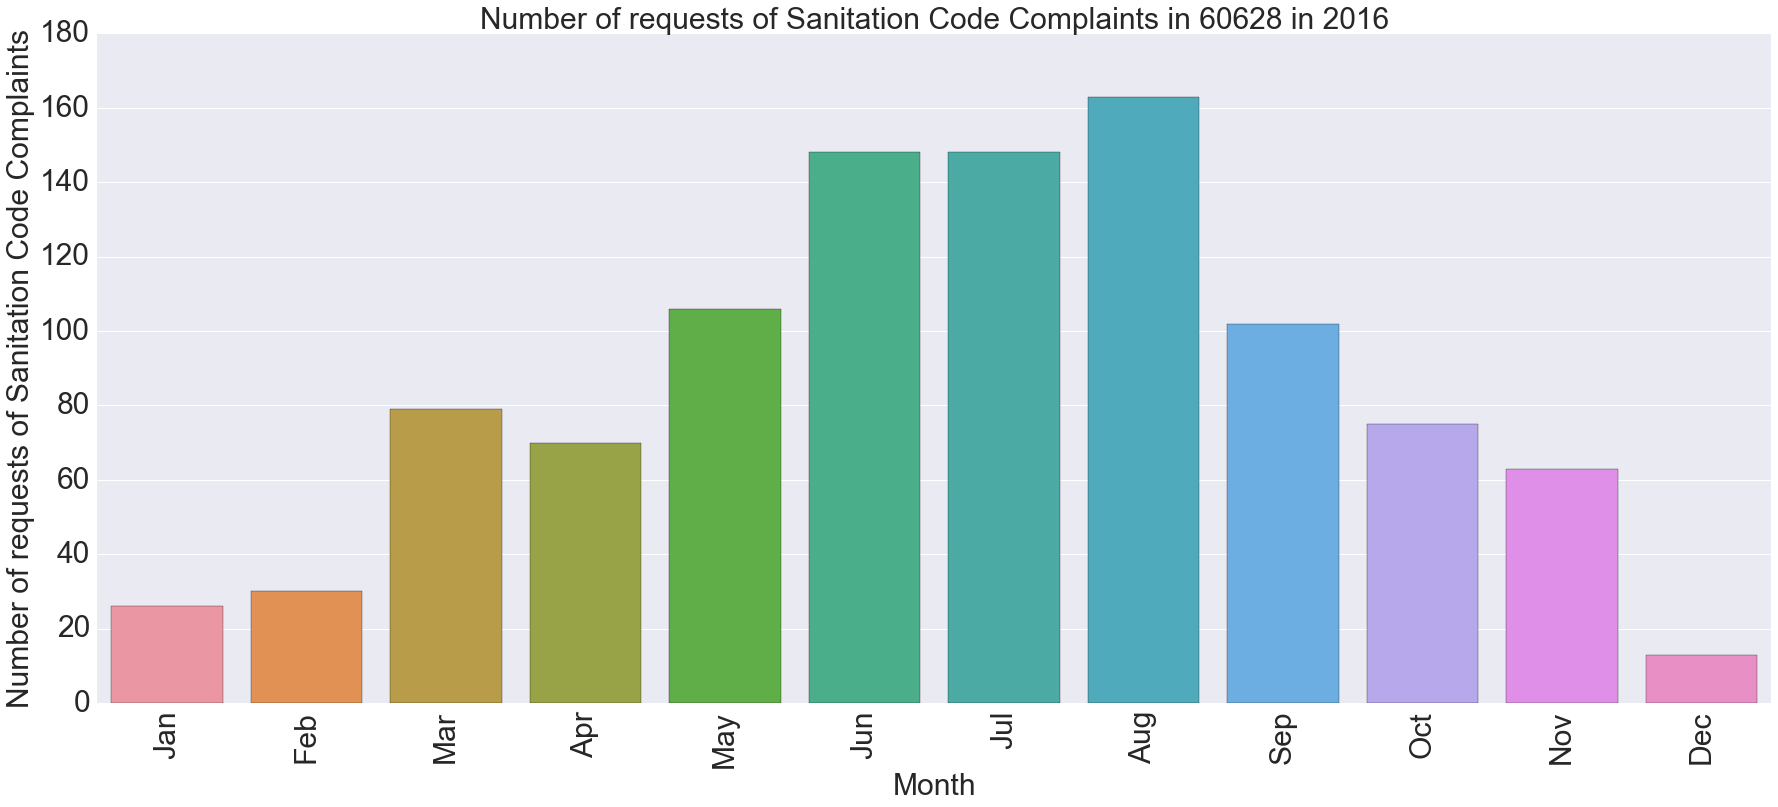

In [319]:
#visualize results
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 30, 'font.size': 20, 'legend.fontsize': 15.0, 'axes.titlesize': 30, "figure.figsize": [30, 12]}
sns.set(rc=rc)
g = sns.barplot(ci = None, x = df_merge_s_groupby["Date"], y = df_merge_s_groupby["Count"], order = order)
plt.xticks(rotation=90)
g.set(xlabel = "Month", ylabel = "Number of requests of Sanitation Code Complaints", title = "Number of requests of Sanitation Code Complaints in 60628 in 2016")
#plt.savefig("Number of requests of Vacant/Abandoned Building in 60636.png", bbox_inches='tight')

The trend is similar for Sanitation Code Complaints in 60628.

#### 4. What is the difference in blocks that get “Vacant and Abandoned Buildings Reported” vs “Sanitation Code Complaints”?


Neighborhoods with fewer white population are more likely to get 'Vacant', while neighborhoods with more African American population are more likely to get 'Sanitation Complaints'

# Problem 3

### A. Of the four types of requests you have data for, which request type is the most likely given the call came from 7500 S Wolcott Ave? What are the probabilities for each type of request?

In [337]:
df[df['Street Address'].str.contains('7500 S WOLCOTT')]

,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",Community Area,Completion Date,Creation Date,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS BUILDING OPEN OR BOARDED?,IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING DANGEROUS OR HAZARDOUS?,IS THE BUILDING VACANT DUE TO FIRE?,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",...,Street Address,Type of Service Request,Ward,What Type of Surface is the Graffiti on?,What is the Nature of this Code Violation?,Where is the Graffiti located?,ZIP Code,Creation_Month,Creation_Month_abr,Address
143852,NaN,71,07/12/2016,2016/05/02 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,7500 S WOLCOTT AVE,Pothole in Street,17,NaN,NaN,NaN,60620.0,5,May,7500 S WOLCOTT AVE
176264,NaN,71,04/22/2016,2016/04/14 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,7500 S WOLCOTT AVE,Sanitation Code Violation,17,NaN,Garbage in alley,NaN,60620.0,4,Apr,7500 S WOLCOTT AVE


There are only two results from 7500 S Wolcott Ave. Based on the result above, **Pothole in Street** and ** Sanitation Code Violation** are the most likely type. They have the probability of 0.5, and the other two types have the probability of 0.

### B. Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Lawndale or Uptown? How much more or less likely is it to be from Lawndale versus Uptown?

In [374]:
df_B = df[df['Type of Service Request'] == "Graffiti Removal"]
len(df_B)

120461

In [372]:
df_B_law1 = df_B[df_B['Community Area'] == 29]
df_B_law2 = df_B[df_B['Community Area'] == 30]
df_B_law =pd.concat([df_B_law1, df_B_law2])
len(df_B_law)

5290

In [373]:
df_B_up = df_B[df_B['Community Area'] == 3]
len(df_B_up)

1833

In the past year, there were 5290 calls about Graffiti Removal that came from Uptown (Community Area is 29&30). There were 1833 calls about Graffiti Removal that came from Lawndale. Therefore, it is more likely that the call came from Lawndale.

The probability that this call is more likely to be from Lawndale is (5290-1833)/(5290+1833) = 48.5%

### C. Now assume that you don’t have access to all the raw data and you know the following things:
There are a total of 1000 calls, 600 from Englewood and 400 from Uptown. Of the 600 calls from Englewood, 100 of them are about Graffiti Removal. Of the 400 calls from Uptown, 160 are about Graffiti Removal. If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Englewood versus Uptown?

From Englewood: (0.6*1/6)/(0.6*1/6+0.4*160/400) = 0.3846

From Uptown: (0.4*160/400)/(0.6*1/6+0.4*160/400) = 0.6154

difference = 0.6154-0.3846 = 23.08%

It is 23.08% more likely that the call came from Uptown.

### END